<a href="https://colab.research.google.com/github/fpinell/mlsa/blob/main/notebooks/Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Software Analysis (MLSA)

- ### University of Florence / IMT Lucca


#### Fabio Pinelli
<a href="mailto:fabio.pinelli@imtlucca.it">fabio.pinelli@imtlucca.it</a><br/>
IMT School for Advanced Studies Lucca<br/>
2024/2025<br/>
October, 17 2024

# So far...

... We saw an overview of different libraries and tools that can be used on Data Science projects:
 - Pandas
  - data exploration
  - data handling and modification
 - Matplotlib and seaborn
 - Scikit
  + model
    - unsupervised
    - supervised
  + pipeline
  + metrics
  


# Today...

We will test/try what YOU have learned so far.

- I'll provide you a dataset
- You will try to provide a solution for the problem
- If we are able, we will test your solutions, and we explore one.

## The dataset

The goal is to predict whether or not a passenger survived based on attributes such as their age, sex, passenger class, where they embarked and so on.

You can find the dataset in the shared drive:
[https://github.com/fpinell/mlsa/tree/main/data/titanic](https://github.com/fpinell/mlsa/tree/main/data/titanic)

The dataset is already divided in training and test, the focus will be on the training.

### Attributes

- Survived: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
- Pclass: passenger class.
- Name, Sex, Age: self-explanatory
- SibSp: how many siblings & spouses of the passenger aboard the Titanic.
- Parch: how many children & parents of the passenger aboard the Titanic.
- Ticket: ticket id
- Fare: price paid (in pounds)
- Cabin: passenger's cabin number
- Embarked: where the passenger embarked the Titanic
  + The Embarked attribute tells us where the passenger embarked:
    * C=Cherbourg,
    * Q=Queenstown,
    * S=Southampton.

### What you should do
- You can work in team, with at most 2 members.
- Read the dataset
- Check the main "peculiarieties" of the columns
- Build a ML pipeline (it's recommended to use the ```scikit Pipeline```)
- Get the predictions
- Save the predictions for the entire test set [your_team_name.csv]. You can put your name, it can be a fictious one.
  - The format of the file:
    - PassengerId, Prediction
  - ``` python df_results[['PassengerId','Survived']].to_csv('/content/drive/fabio.csv',index=False) ```
- Download the dataset and share it with me (if you want)

- Then I can evaluate your results and keep updated your scores.


### What I'll do
  - Try to help you during the test
  - Load your uploaded files and trying to evaluate your solution
  - Explore a possible solution :-)  

### Few tips

- You are free to remove columns and rows
- You are free to use any material available, don't copy existing solutions on internet, you need to test your skills
- Small suggestion, don't use columns that might contain unique identifier for your model, e.g. PassengerId.
- Be able to "attach" the PassengerID to your final predictions.

## Cargar el Dataset

In [ ]:
import pandas as pd

# Cargar el conjunto de datos
url = 'https://raw.githubusercontent.com/fpinell/mlsa/refs/heads/main/data/titanic/train_mlsa.csv'

df = pd.read_csv(url)

# Mostrar las primeras filas del conjunto de datos
print(df.head())



   PassengerId  Survived  Pclass                            Name     Sex  \
0          104         0       3      Johansson, Mr. Gustaf Joel    male   
1          350         0       3                Dimic, Mr. Jovan    male   
2            8         0       3  Palsson, Master. Gosta Leonard    male   
3          346         1       2   Brown, Miss. Amelia "Mildred"  female   
4          653         0       3  Kalvik, Mr. Johannes Halvorsen    male   

    Age  SibSp  Parch  Ticket     Fare Cabin Embarked  
0  33.0      0      0    7540   8.6542   NaN        S  
1  42.0      0      0  315088   8.6625   NaN        S  
2   2.0      3      1  349909  21.0750   NaN        S  
3  24.0      0      0  248733  13.0000   F33        S  
4  21.0      0      0    8475   8.4333   NaN        S  


## Preprocesamiento de los Datos

Age         157
Cabin       612
Embarked      2
dtype: int64
Age         19.848293
Cabin       77.370417
Embarked     0.252845
dtype: float64
Duplicados: 0
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

Distribución de Name:
Name
Johansson, Mr. Gustaf Joel                      1
Doling, Mrs. John T (Ada Julia Bone)            1
Hendekovic, Mr. Ignjac                          1
Goldenberg, Mrs. Samuel L (Edwiga Grabowska)    1
Risien, Mr. Samuel Beard                        1
                                               ..
Peter, Miss. Anna                               1
Davies, Master. John Morgan Jr                  1
Morley, Mr. William                             1
Drazenoic, Mr. Jozef                            1
Keane, Miss. Nora A                             1
Name: count, Length: 791, dtype: int64

Distribución de Sex:
Sex
male      510
female    281
Name: count, dtype: int64

Distribución de Ticket:
Ticket
1601        6
CA. 2343    6
3101295     6
347

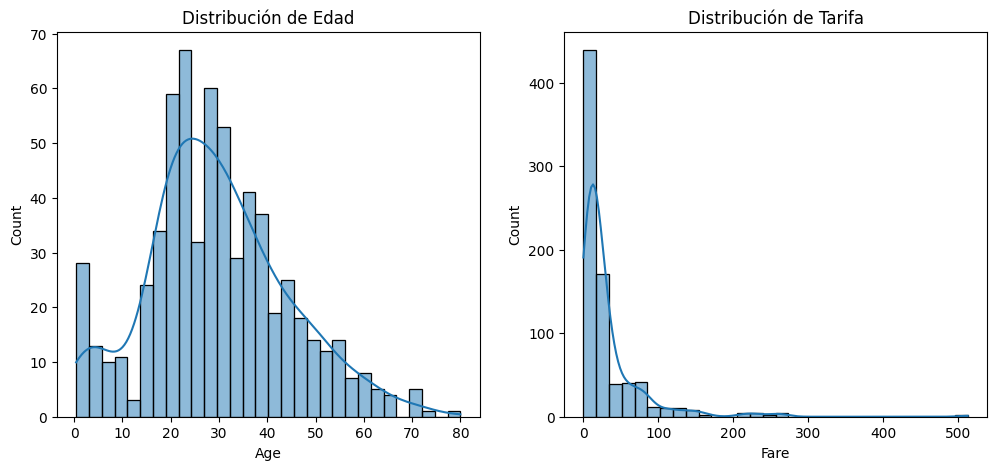

Age_Category
Adulto Joven    315
Adulto          177
Infante          63
Adolescente      60
Anciano          19
Name: count, dtype: int64


In [ ]:
#----------Mising Values

# Comprobar los valores faltantes
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Opcional: calcular el porcentaje de valores faltantes
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage[missing_percentage > 0])

#----------Duplicates
# Comprobar si hay duplicados
duplicates = df.duplicated().sum()
print(f'Duplicados: {duplicates}')


#--------Categorical Columns
# Identificar columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

# Revisar la distribución de las columnas categóricas
for col in categorical_cols:
    print(f'\nDistribución de {col}:')
    print(df[col].value_counts())


#---------Data Distributions
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la distribución de 'Age' y 'Fare'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Distribución de Edad')

plt.subplot(1, 2, 2)
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Distribución de Tarifa')

plt.show()

#-----Feature Engineering
# Crear una nueva columna categórica para la edad
df['Age_Category'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Infante', 'Adolescente', 'Adulto Joven', 'Adulto', 'Anciano'])

# Ver la nueva columna
print(df['Age_Category'].value_counts())



## Construcción de la Pipeline de Machine Learning

In [ ]:
# Importar bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer  # Importar desde sklearn.impute
from sklearn.compose import ColumnTransformer

# Separar características y variable objetivo
X = df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df['Survived']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las columnas categóricas y numéricas
categorical_features = ['Sex', 'Embarked']
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass']

# Crear el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Crear el pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', RandomForestClassifier(random_state=42))])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Realizar predicciones
predictions = pipeline.predict(X_test)

# Mostrar algunas predicciones
print(predictions)


[0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0
 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 1 0 1 1 1 0]


## Predicciones en el Conjunto de Prueba

In [ ]:
# Realizar predicciones
predictions = pipeline.predict(X_test)

# Crear DataFrame con los resultados
results = pd.DataFrame({
    'PassengerId': X_test.index,
    'Survived': predictions
})

# Guardar los resultados en CSV
results.to_csv('titanic_predictions.csv', index=False)
